In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os

fn = []

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        fn.append(os.path.join(dirname, filename))
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sleep-time-prediction/sleeptime_prediction_dataset.csv


In [2]:
fn

['/kaggle/input/sleep-time-prediction/sleeptime_prediction_dataset.csv']

In [3]:
df = pd.read_csv(fn[0])
df

,WorkoutTime,ReadingTime,PhoneTime,WorkHours,CaffeineIntake,RelaxationTime,SleepTime
0,1.12,0.52,3.29,7.89,216.08,0.75,3.45
1,2.85,0.49,4.22,5.03,206.18,0.67,4.88
2,2.20,1.81,4.04,9.23,28.73,0.35,3.61
3,1.80,0.50,1.62,7.68,276.77,1.21,4.94
4,0.47,0.54,1.60,4.94,170.54,0.95,5.50
...,...,...,...,...,...,...,...
1995,1.97,0.88,3.74,5.64,257.30,0.01,4.24
1996,2.87,0.67,3.01,5.26,269.25,1.75,5.89
1997,0.21,0.79,4.06,6.73,284.01,0.61,3.00
1998,0.17,1.06,2.94,9.45,119.25,1.88,3.53


In [4]:
df.describe()

,WorkoutTime,ReadingTime,PhoneTime,WorkHours,CaffeineIntake,RelaxationTime,SleepTime
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1.495915,0.992785,2.985195,6.926945,147.493780,1.010955,4.884375
std,0.876639,0.577303,1.151776,1.723843,84.651139,0.582619,2.028892
min,0.010000,0.000000,1.000000,4.000000,0.020000,0.000000,0.150000
25%,0.710000,0.500000,1.990000,5.440000,75.980000,0.510000,3.840000
50%,1.520000,0.990000,2.965000,6.910000,146.010000,1.010000,4.600000
75%,2.250000,1.500000,3.960000,8.422500,218.902500,1.530000,5.470000
max,3.000000,2.000000,5.000000,10.000000,299.850000,2.000000,19.810000


In [5]:
df.columns

Index(['WorkoutTime', 'ReadingTime', 'PhoneTime', 'WorkHours',
       'CaffeineIntake', 'RelaxationTime', 'SleepTime'],
      dtype='object')

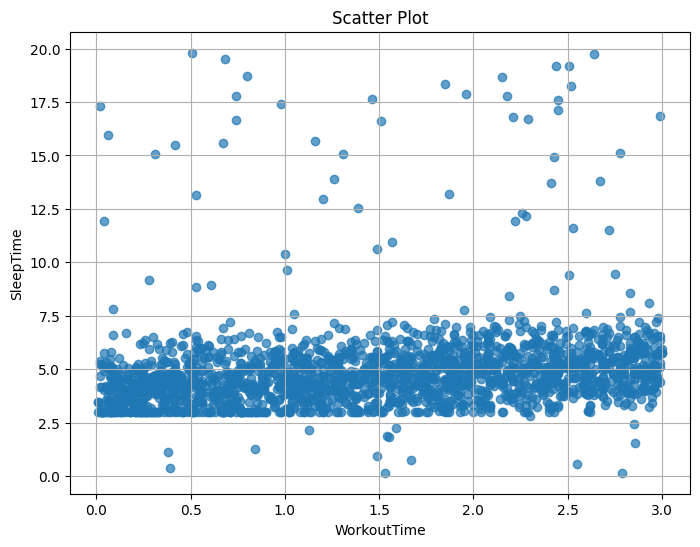

In [6]:
import matplotlib.pyplot as plt

# Scatter plot between the first two columns
plt.figure(figsize=(8, 6))
plt.scatter(df[df.columns[0]], df[df.columns[6]], alpha=0.7)
plt.xlabel(df.columns[0])
plt.ylabel(df.columns[6])
plt.title('Scatter Plot')
plt.grid(True)
plt.show()

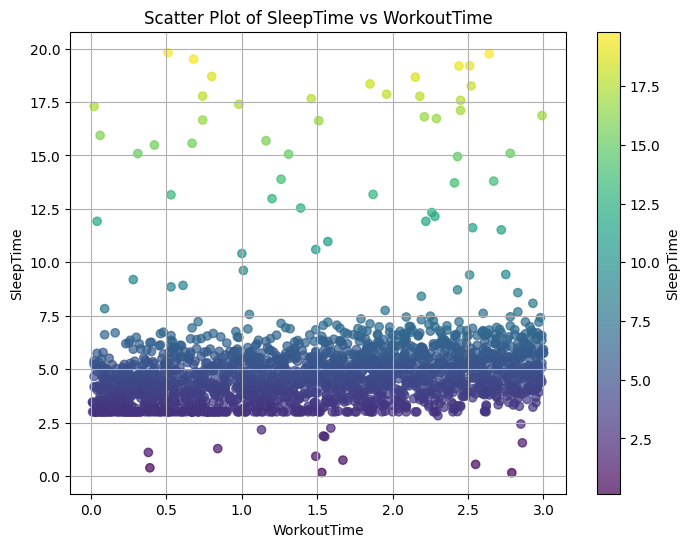

In [7]:
import matplotlib.pyplot as plt

# Scatter plot with color mapping based on another column (e.g., column 2)
plt.figure(figsize=(8, 6))
scatter = plt.scatter(
    df[df.columns[0]],      # X-axis
    df[df.columns[6]],      # Y-axis
    c=df[df.columns[6]],    # Color based on values in column 2
    cmap='viridis',         # Colormap (you can use 'plasma', 'inferno', 'coolwarm', etc.)
    alpha=0.7
)
plt.xlabel(df.columns[0])
plt.ylabel(df.columns[6])
# plt.title('Scatter Plot with Color Mapping')
plt.title(f'Scatter Plot of {df.columns[6]} vs {df.columns[0]}')  # Dynamic title
plt.colorbar(scatter, label=df.columns[6])  # Adds color bar for reference
plt.grid(True)
plt.show()

In [8]:
# import matplotlib.pyplot as plt

# # Loop over all combinations of columns for scatter plots
# for i in range(len(df.columns)):
#     for j in range(len(df.columns)):
#         if i != j:  # Avoid plotting the same column against itself
#             plt.figure(figsize=(8, 6))
#             scatter = plt.scatter(
#                 df[df.columns[i]],      # X-axis
#                 df[df.columns[j]],      # Y-axis
#                 c=df[df.columns[j]],    # Color based on Y-axis values
#                 cmap='viridis',
#                 alpha=0.7
#             )
#             plt.xlabel(df.columns[i])
#             plt.ylabel(df.columns[j])
#             plt.title(f'Scatter Plot of {df.columns[j]} vs {df.columns[i]}')
#             plt.colorbar(scatter, label=df.columns[j])
#             plt.grid(True)
#             plt.show()

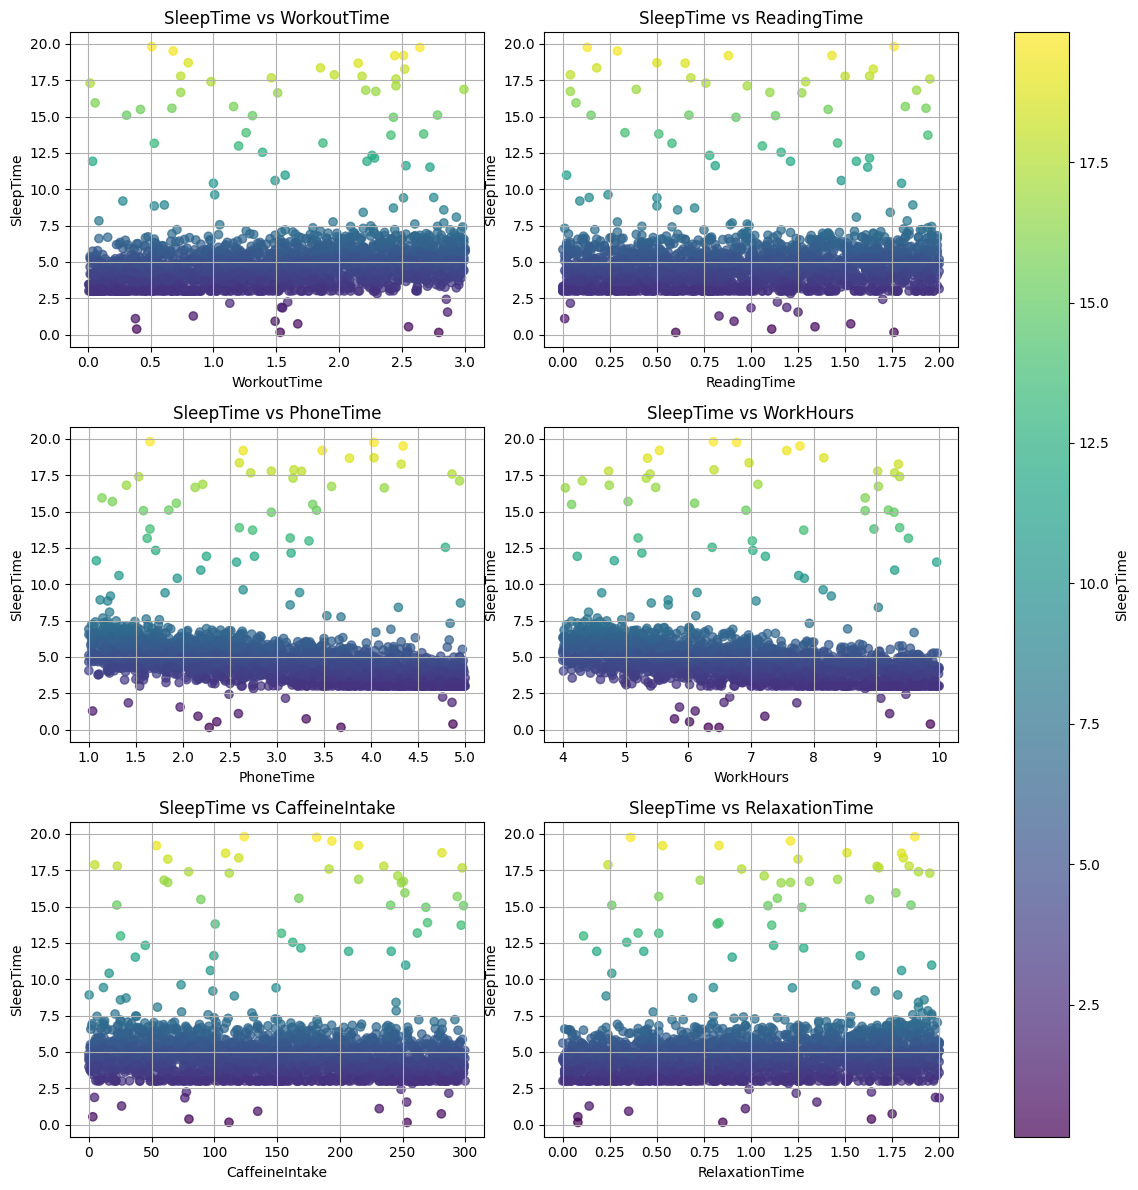

In [9]:
# # Loop over all columns to plot them against df.columns[6]
# target_col_index = 6  # Column to be used as Y-axis

# for i in range(len(df.columns)):
#     if i != target_col_index:  # Avoid plotting the column against itself
#         plt.figure(figsize=(8, 6))
#         scatter = plt.scatter(
#             df[df.columns[i]],           # X-axis
#             df[df.columns[target_col_index]],  # Y-axis
#             c=df[df.columns[target_col_index]],  # Color based on Y-axis values
#             cmap='viridis',
#             alpha=0.7
#         )
#         plt.xlabel(df.columns[i])
#         plt.ylabel(df.columns[target_col_index])
#         plt.title(f'Scatter Plot of {df.columns[target_col_index]} vs {df.columns[i]}')
#         plt.colorbar(scatter, label=df.columns[target_col_index])
#         plt.grid(True)
#         plt.show()

import matplotlib.pyplot as plt

# Define the target column for the Y-axis
target_col_index = 6  # Column to be used as Y-axis

# Calculate the number of subplots needed
num_plots = len(df.columns) - 1  # Exclude the target column
num_cols = 2  # 2 plots per row
num_rows = (num_plots + 1) // num_cols  # Rows needed

fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 4 * num_rows))
axes = axes.flatten()  # Flatten to simplify indexing

plot_idx = 0  # Track subplot index

for i in range(len(df.columns)):
    if i != target_col_index:
        ax = axes[plot_idx]
        scatter = ax.scatter(
            df[df.columns[i]], 
            df[df.columns[target_col_index]], 
            c=df[df.columns[target_col_index]], 
            cmap='viridis', 
            alpha=0.7
        )
        ax.set_xlabel(df.columns[i])
        ax.set_ylabel(df.columns[target_col_index])
        ax.set_title(f'{df.columns[target_col_index]} vs {df.columns[i]}')
        ax.grid(True)
        plot_idx += 1

# Remove any unused subplots
for j in range(plot_idx, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.colorbar(scatter, ax=axes, label=df.columns[target_col_index])
plt.show()


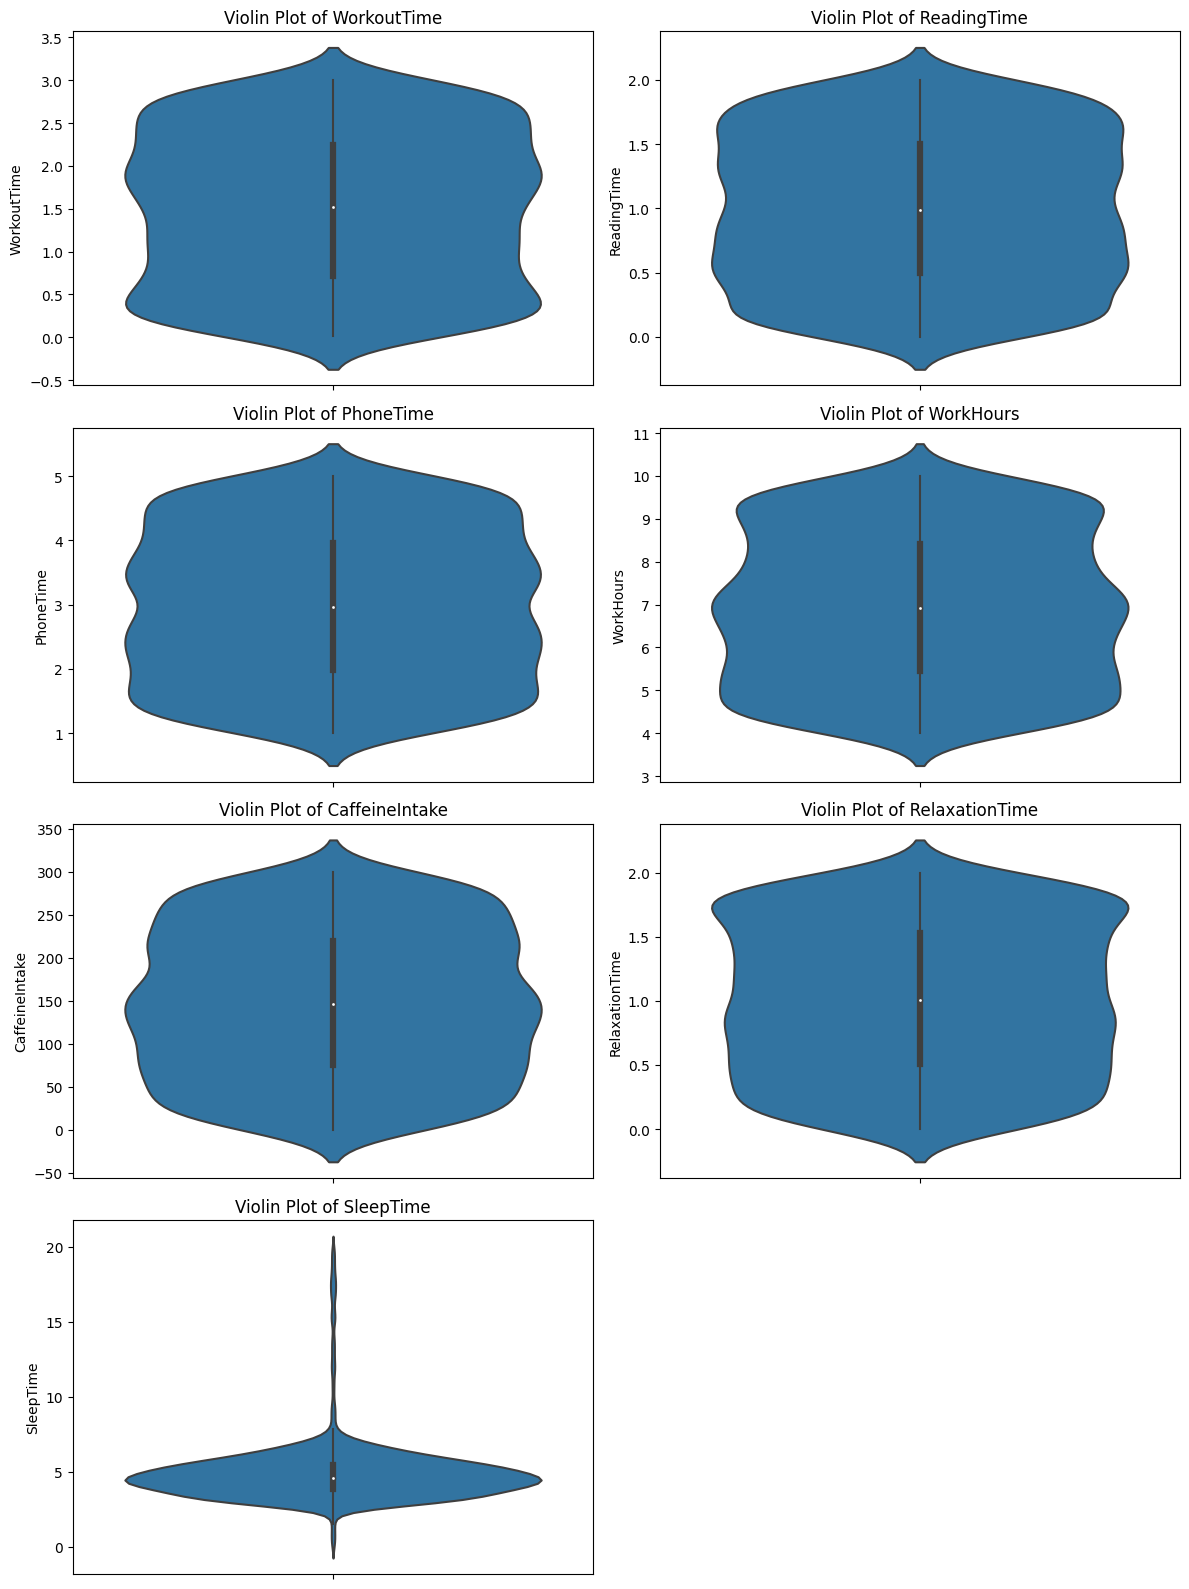

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Number of columns in the DataFrame
num_cols = len(df.columns)
cols_per_row = 2  # 2 plots per row
num_rows = (num_cols + 1) // cols_per_row  # Calculate number of rows

# Create subplots
fig, axes = plt.subplots(num_rows, cols_per_row, figsize=(12, 4 * num_rows))
axes = axes.flatten()  # Flatten for easy indexing

# Plot violin plots for each column
for i, col in enumerate(df.columns):
    sns.violinplot(y=df[col], ax=axes[i])
    axes[i].set_title(f'Violin Plot of {col}')
    axes[i].set_ylabel(col)

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

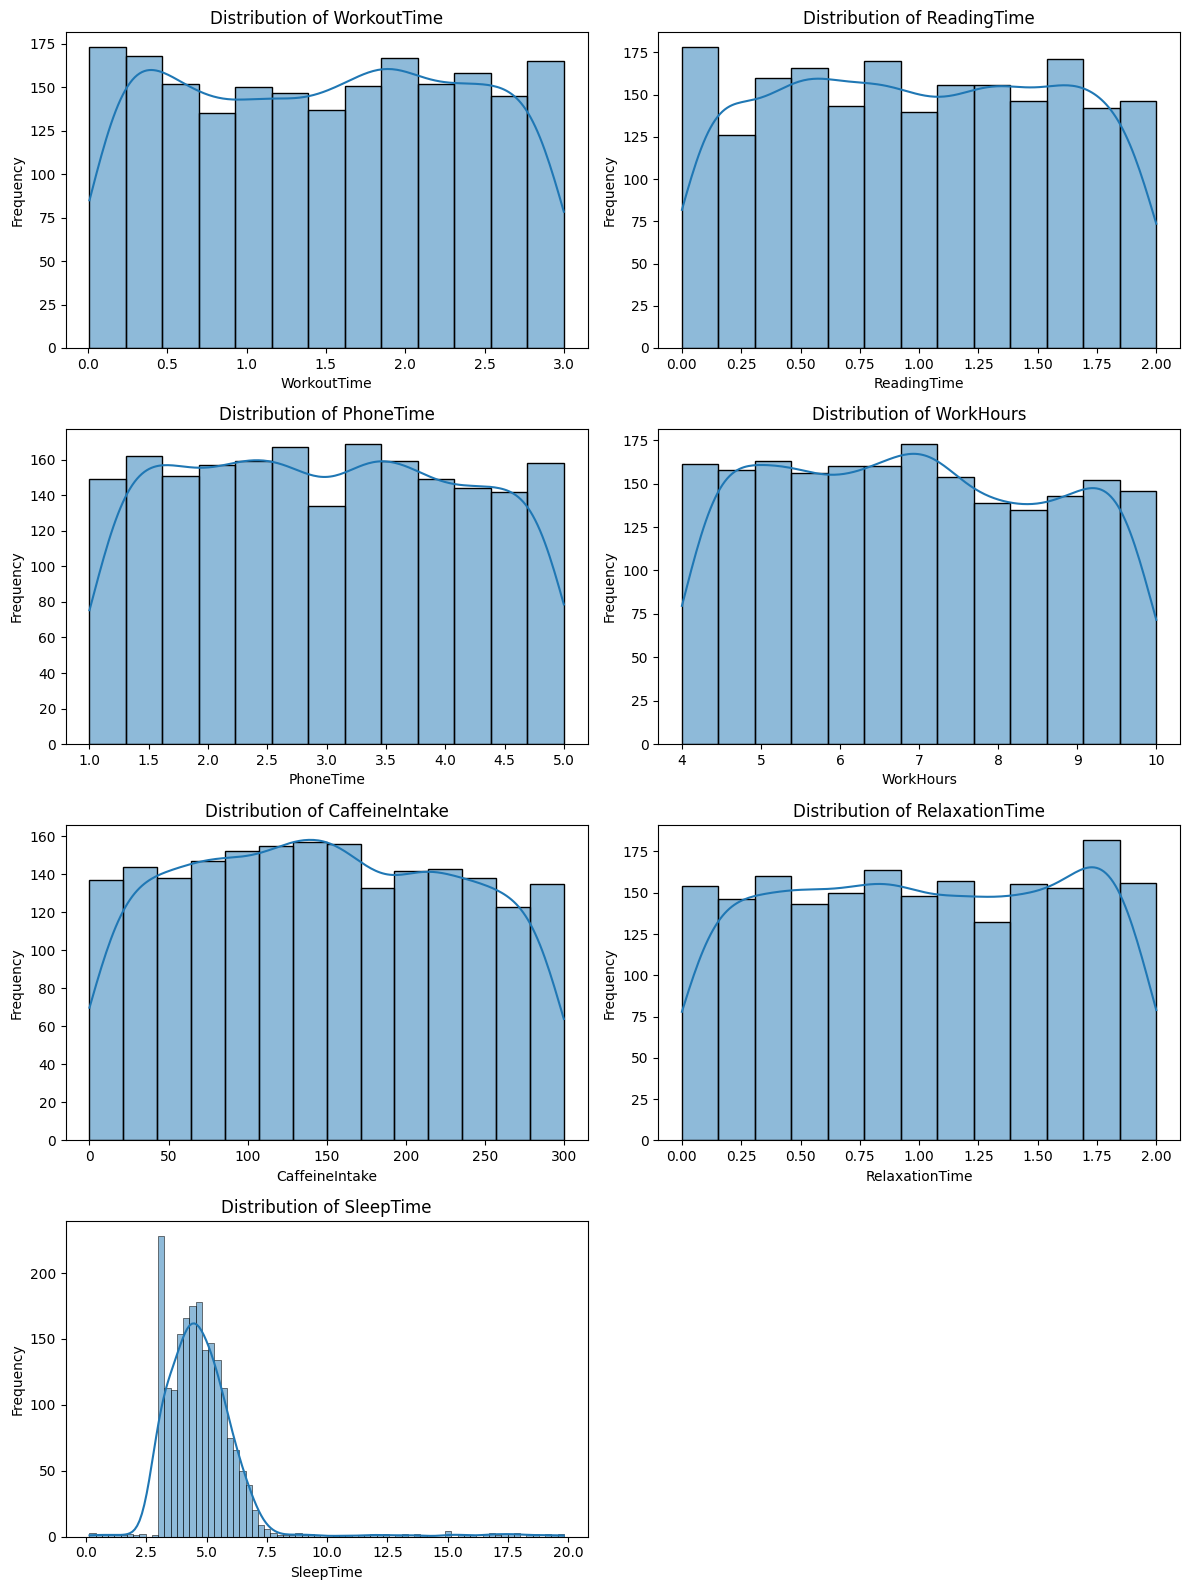

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Number of columns in the DataFrame
num_cols = len(df.columns)
cols_per_row = 2  # 2 plots per row
num_rows = (num_cols + 1) // cols_per_row  # Calculate number of rows

# Create subplots
fig, axes = plt.subplots(num_rows, cols_per_row, figsize=(12, 4 * num_rows))
axes = axes.flatten()  # Flatten for easy indexing

# Plot distribution for each column
for i, col in enumerate(df.columns):
    sns.histplot(df[col], kde=True, ax=axes[i])  # Use histplot with KDE
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [12]:
from scipy.stats import skew

# Calculate skewness for all numeric columns
skewness_value = skew(df, nan_policy='omit')

# Pair skewness values with their corresponding column names
for col, skew_val in zip(df.columns, skewness_value):
    print(f"Column: {col}, Skewness: {skew_val}")

Column: WorkoutTime, Skewness: -0.010473464576920978
Column: ReadingTime, Skewness: 0.003951835561057121
Column: PhoneTime, Skewness: 0.03240496517210216
Column: WorkHours, Skewness: 0.06250083969542268
Column: CaffeineIntake, Skewness: 0.03529967649365271
Column: RelaxationTime, Skewness: -0.024174136939144334
Column: SleepTime, Skewness: 3.9217347475452473


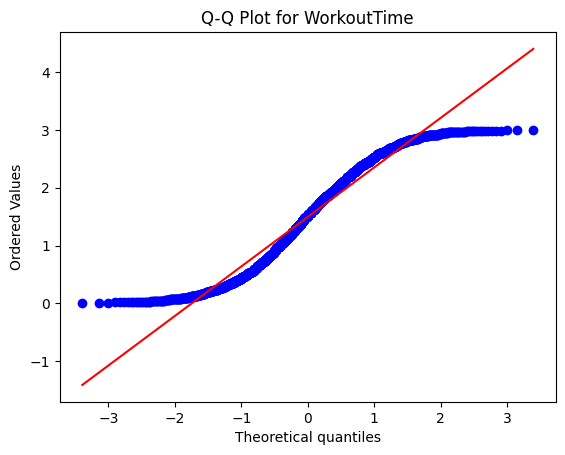

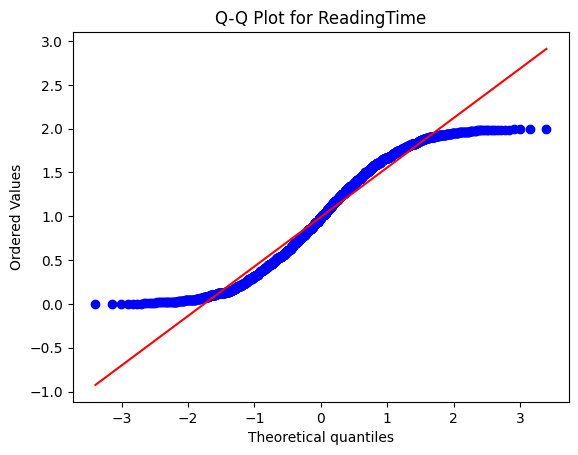

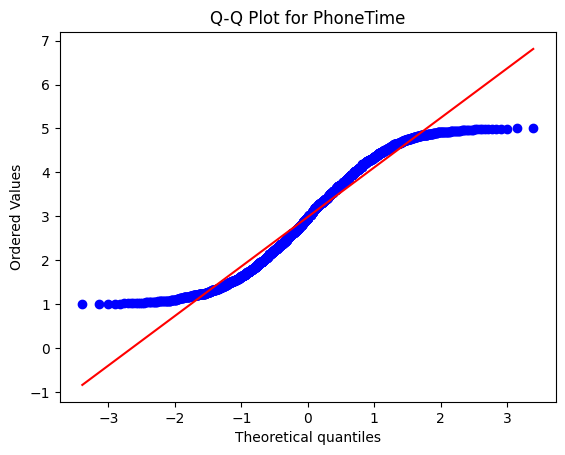

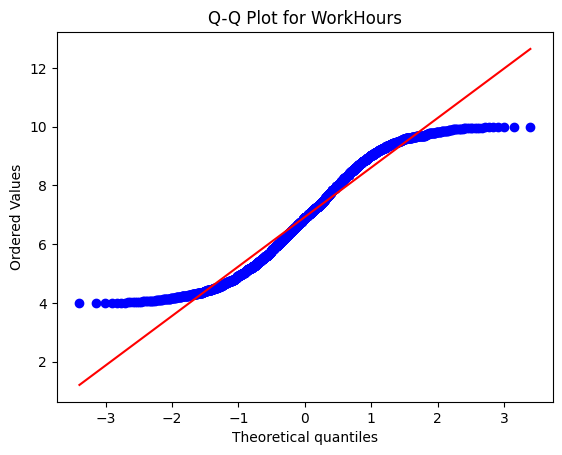

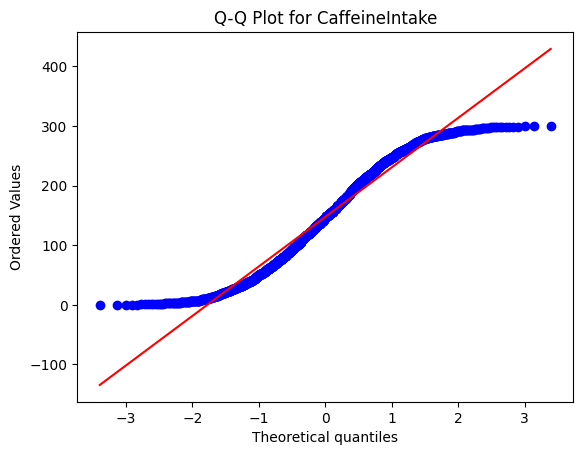

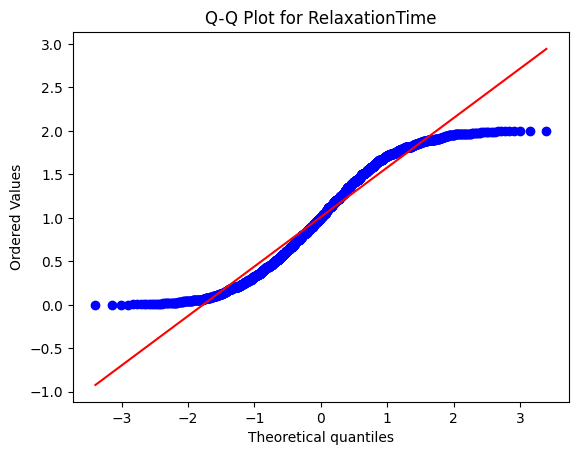

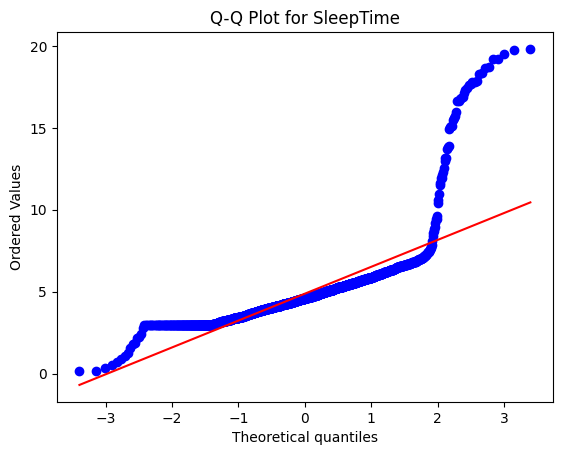

In [13]:
import scipy.stats as stats
import matplotlib.pyplot as plt

for col in df.select_dtypes(include='number').columns:
    stats.probplot(df[col], dist="norm", plot=plt)
    plt.title(f'Q-Q Plot for {col}')
    plt.show()

In [14]:
import numpy as np

# Apply log transformation to SleepTime (adding 1 to handle zeros)
df['SleepTime_log'] = np.log1p(df['SleepTime'])
df

,WorkoutTime,ReadingTime,PhoneTime,WorkHours,CaffeineIntake,RelaxationTime,SleepTime,SleepTime_log
0,1.12,0.52,3.29,7.89,216.08,0.75,3.45,1.492904
1,2.85,0.49,4.22,5.03,206.18,0.67,4.88,1.771557
2,2.20,1.81,4.04,9.23,28.73,0.35,3.61,1.528228
3,1.80,0.50,1.62,7.68,276.77,1.21,4.94,1.781709
4,0.47,0.54,1.60,4.94,170.54,0.95,5.50,1.871802
...,...,...,...,...,...,...,...,...
1995,1.97,0.88,3.74,5.64,257.30,0.01,4.24,1.656321
1996,2.87,0.67,3.01,5.26,269.25,1.75,5.89,1.930071
1997,0.21,0.79,4.06,6.73,284.01,0.61,3.00,1.386294
1998,0.17,1.06,2.94,9.45,119.25,1.88,3.53,1.510722


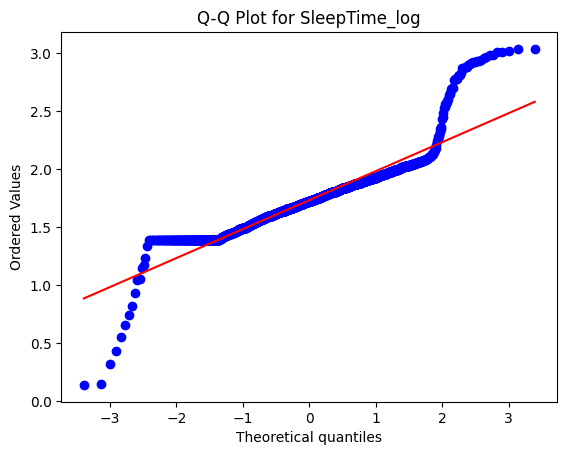

In [15]:
import scipy.stats as stats
import matplotlib.pyplot as plt

# for col in df.select_dtypes(include='number').columns:
stats.probplot(df[df.columns[7]], dist="norm", plot=plt)
plt.title(f'Q-Q Plot for {df.columns[7]}')
plt.show()

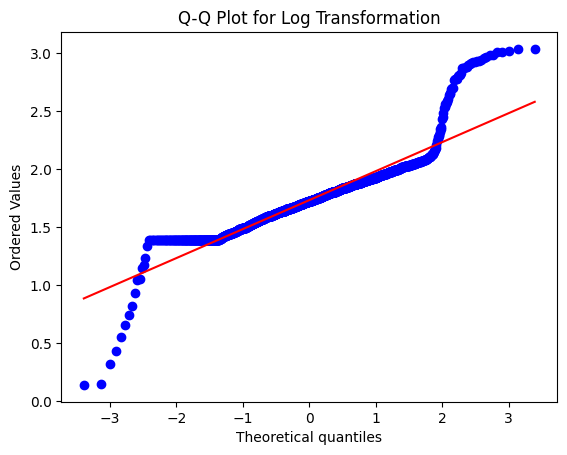

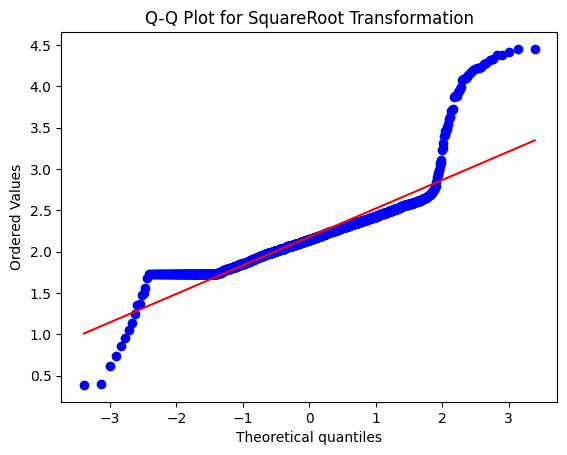

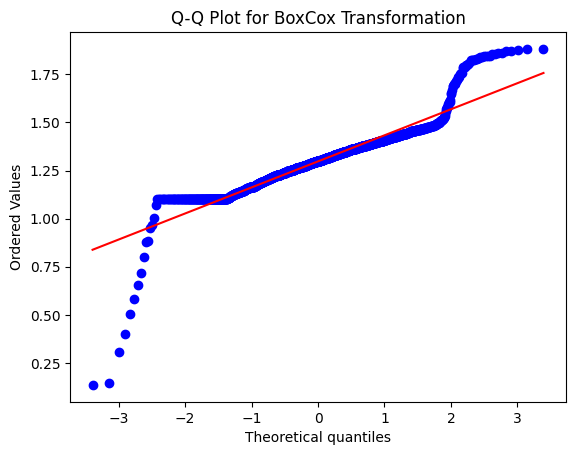

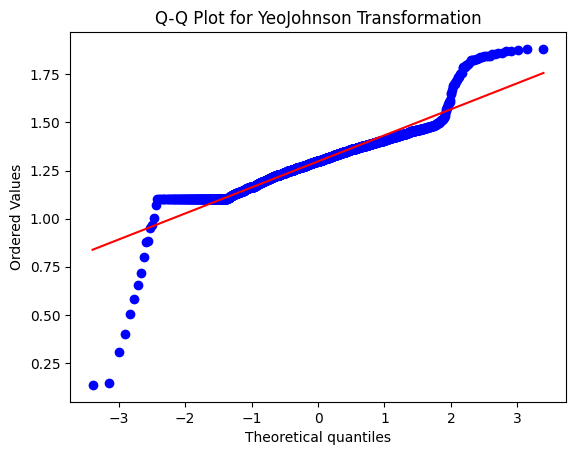

{'Log': 0.9700694006861836,
 'SquareRoot': 2.1655617738771205,
 'BoxCox': -0.2299259539363498,
 'YeoJohnson': -0.22992611023009876}

In [16]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

# Assuming df already exists with the 'SleepTime' column

# Remove 'SleepTime_log' column if it exists
if 'SleepTime_log' in df.columns:
    df.drop(columns='SleepTime_log', inplace=True)

# Define transformation functions
transformations = {
    'Log': lambda x: np.log1p(x),
    'SquareRoot': lambda x: np.sqrt(x),
    'BoxCox': lambda x: stats.boxcox(x + 1)[0],  # Add 1 to handle zero values
    'YeoJohnson': lambda x: stats.yeojohnson(x)[0]
}

# Store skewness results
skew_results = {}

# Apply transformations and calculate skewness
for name, func in transformations.items():
    try:
        transformed = func(df['SleepTime'])
        skew_value = stats.skew(transformed, nan_policy='omit')
        skew_results[name] = skew_value
        
        # Plot Q-Q plot
        stats.probplot(transformed, dist="norm", plot=plt)
        plt.title(f'Q-Q Plot for {name} Transformation')
        plt.show()
        
    except ValueError as e:
        skew_results[name] = np.nan  # Handle transformations that fail

# Identify the transformation with the least skewness
best_transformation = min(skew_results, key=lambda k: abs(skew_results[k]))

# Apply the best transformation and add it to the DataFrame
df[f'SleepTime_{best_transformation}'] = transformations[best_transformation](df['SleepTime'])

# Display the skewness values
skew_results

In [17]:
df

,WorkoutTime,ReadingTime,PhoneTime,WorkHours,CaffeineIntake,RelaxationTime,SleepTime,SleepTime_BoxCox
0,1.12,0.52,3.29,7.89,216.08,0.75,3.45,1.166769
1,2.85,0.49,4.22,5.03,206.18,0.67,4.88,1.325508
2,2.20,1.81,4.04,9.23,28.73,0.35,3.61,1.187746
3,1.80,0.50,1.62,7.68,276.77,1.21,4.94,1.331008
4,0.47,0.54,1.60,4.94,170.54,0.95,5.50,1.378984
...,...,...,...,...,...,...,...,...
1995,1.97,0.88,3.74,5.64,257.30,0.01,4.24,1.261707
1996,2.87,0.67,3.01,5.26,269.25,1.75,5.89,1.409227
1997,0.21,0.79,4.06,6.73,284.01,0.61,3.00,1.101885
1998,0.17,1.06,2.94,9.45,119.25,1.88,3.53,1.177382


In [18]:
# Check for null values in each column
null_counts = df.isnull().sum()
print("Null values in each column:\n", null_counts)

Null values in each column:
 WorkoutTime         0
ReadingTime         0
PhoneTime           0
WorkHours           0
CaffeineIntake      0
RelaxationTime      0
SleepTime           0
SleepTime_BoxCox    0
dtype: int64


In [19]:
# Check for empty string values in each column (for object/string columns)
empty_counts = (df.apply(lambda x: x == '')).sum()
print("Empty string values in each column:\n", empty_counts)

Empty string values in each column:
 WorkoutTime         0
ReadingTime         0
PhoneTime           0
WorkHours           0
CaffeineIntake      0
RelaxationTime      0
SleepTime           0
SleepTime_BoxCox    0
dtype: int64


In [20]:
# Check for zero values in each column (numeric columns)
zero_counts = (df == 0).sum()
print("Zero values in each column:\n", zero_counts)

Zero values in each column:
 WorkoutTime         0
ReadingTime         7
PhoneTime           0
WorkHours           0
CaffeineIntake      0
RelaxationTime      4
SleepTime           0
SleepTime_BoxCox    0
dtype: int64


In [21]:
# Combined summary of null, empty, and zero values
summary = pd.DataFrame({
    'Null Values': df.isnull().sum(),
    'Empty Strings': df.apply(lambda x: (x == '').sum()),
    'Zero Values': (df == 0).sum()
})

print("Summary of Null, Empty, and Zero values:\n", summary)

Summary of Null, Empty, and Zero values:
                   Null Values  Empty Strings  Zero Values
WorkoutTime                 0              0            0
ReadingTime                 0              0            7
PhoneTime                   0              0            0
WorkHours                   0              0            0
CaffeineIntake              0              0            0
RelaxationTime              0              0            4
SleepTime                   0              0            0
SleepTime_BoxCox            0              0            0


In [22]:
df.columns

Index(['WorkoutTime', 'ReadingTime', 'PhoneTime', 'WorkHours',
       'CaffeineIntake', 'RelaxationTime', 'SleepTime', 'SleepTime_BoxCox'],
      dtype='object')

In [23]:
from sklearn.model_selection import train_test_split
import pandas as pd

# Define feature columns (X) and target column (y)
X = df[['WorkoutTime', 'ReadingTime', 'PhoneTime', 'WorkHours',
        'CaffeineIntake', 'RelaxationTime']]
y = df['SleepTime_BoxCox']

In [24]:
X

,WorkoutTime,ReadingTime,PhoneTime,WorkHours,CaffeineIntake,RelaxationTime
0,1.12,0.52,3.29,7.89,216.08,0.75
1,2.85,0.49,4.22,5.03,206.18,0.67
2,2.20,1.81,4.04,9.23,28.73,0.35
3,1.80,0.50,1.62,7.68,276.77,1.21
4,0.47,0.54,1.60,4.94,170.54,0.95
...,...,...,...,...,...,...
1995,1.97,0.88,3.74,5.64,257.30,0.01
1996,2.87,0.67,3.01,5.26,269.25,1.75
1997,0.21,0.79,4.06,6.73,284.01,0.61
1998,0.17,1.06,2.94,9.45,119.25,1.88


In [25]:
y

0       1.166769
1       1.325508
2       1.187746
3       1.331008
4       1.378984
          ...   
1995    1.261707
1996    1.409227
1997    1.101885
1998    1.177382
1999    1.404726
Name: SleepTime_BoxCox, Length: 2000, dtype: float64

In [26]:
# Bin the continuous target to make stratification possible
y_binned = pd.qcut(y, q=4, labels=False)  # Divides y into 4 equal bins

y_binned

0       0
1       2
2       0
3       2
4       3
       ..
1995    1
1996    3
1997    0
1998    0
1999    3
Name: SleepTime_BoxCox, Length: 2000, dtype: int64

In [27]:
# Perform stratified train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y_binned
)

# Check the split sizes
print(f"Train set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")

Train set size: 1600
Test set size: 400


In [28]:
X_train

,WorkoutTime,ReadingTime,PhoneTime,WorkHours,CaffeineIntake,RelaxationTime
1119,0.39,0.43,2.13,7.43,258.65,0.88
517,2.43,0.95,4.59,8.36,276.99,1.09
951,2.00,1.39,1.21,6.84,247.23,1.54
897,2.69,0.56,2.19,4.02,173.58,0.43
294,0.38,0.01,2.59,9.21,231.40,0.97
...,...,...,...,...,...,...
1176,2.34,1.33,4.54,9.95,69.56,1.20
1224,1.26,0.33,2.60,9.37,269.84,0.83
1352,1.32,1.82,2.15,6.98,262.93,0.55
144,0.85,0.94,4.67,8.70,285.28,1.25


In [29]:
y_train

1119    1.224558
517     1.143339
951     1.423140
897     1.446825
294     0.654594
          ...   
1176    1.133325
1224    1.756939
1352    1.319932
144     1.101885
882     1.179996
Name: SleepTime_BoxCox, Length: 1600, dtype: float64

In [30]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Assuming X_train, y_train, X_test, y_test are already defined

# Initialize Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)

print(f"Random Forest Model Mean Squared Error: {mse:.4f}")


Random Forest Model Mean Squared Error: 0.0115


In [31]:
# Create DataFrame to compare actual vs predicted and error
results_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred,
    'Error': y_test - y_pred
})

results_df.head()

,Actual,Predicted,Error
613,1.433774,1.417169,0.016604
641,1.252996,1.306158,-0.053162
1682,1.207767,1.191804,0.015963
1148,1.373296,1.364084,0.009212
577,1.485254,1.456122,0.029132
